In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [108]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [109]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [110]:
ipl.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [111]:
#Dropping certain features 
df = ipl.drop(['runs_last_5', 
               'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [112]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [113]:
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [114]:
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))] #Remove inconsistent team

In [115]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [116]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')) #Convert into Date format

In [117]:
df = df[df['overs']>=5.0]
df.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,222


In [120]:
X = df.drop(['total'], axis =1)
y = df['total']

X.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5


In [121]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [122]:
X.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs
32,2008-04-18,13,3,6,46,269,61,0,5.1
33,2008-04-18,13,3,6,262,269,61,1,5.2
34,2008-04-18,13,3,6,242,269,61,1,5.3
35,2008-04-18,13,3,6,242,269,61,1,5.4
36,2008-04-18,13,3,6,242,269,61,1,5.5


In [123]:
X_train = X.drop(labels = 'date', axis = 1)[df['date'].dt.year <= 2016]
X_test = X.drop(labels = 'date', axis = 1) [df['date'].dt.year >= 2017]

y_train = y[df['date'].dt.year <= 2016].values
y_test = y[df['date'].dt.year >= 2017].values

In [124]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(37330, 8) (37330,)
(2778, 8) (2778,)


In [125]:
X_train.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs
32,13,3,6,46,269,61,0,5.1
33,13,3,6,262,269,61,1,5.2
34,13,3,6,242,269,61,1,5.3
35,13,3,6,242,269,61,1,5.4
36,13,3,6,242,269,61,1,5.5


In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [128]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 61.8322 - val_loss: 12.8871
Epoch 2/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.0984 - val_loss: 11.7391
Epoch 3/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.5674 - val_loss: 11.9255
Epoch 4/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.5672 - val_loss: 11.6444
Epoch 5/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.5239 - val_loss: 11.6279
Epoch 6/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.4205 - val_loss: 11.6845
Epoch 7/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.4566 - val_loss: 11.7532
Epoch 8/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.3521 - val_loss: 11.8232
Epoch 9/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.4140 - val_loss: 11.9168
Epoch 10/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12.3771 - val_loss: 12.2620
Epoch 11/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.3258 - val_loss: 12.8324
Epoch 12/50
584/584 ━━━━━━━━━━

<Axes: >

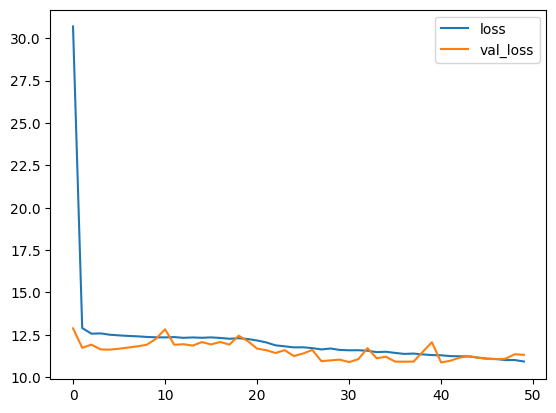

In [129]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [130]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,predictions))
# print(mean_squared_error(y_test,predictions))
print(r2_score(y_test,predictions))

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11.81364631652832
0.7734129428863525


In [131]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')
runs = widgets.IntText(description = 'runs')
wickets = widgets.IntText(description = 'wickets')
overs = widgets.FloatText(description = 'overs')


predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])
        runs_text = int(runs.value)
        wickets_text = int(wickets.value)
        overs_text = float(overs.value)

        input = np.array([decoded_venue[0],  decoded_batting_team[0], decoded_bowling_team[0],
               decoded_striker[0], decoded_bowler[0],runs_text,wickets_text,overs_text])
        input = input.reshape(1,8)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [132]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, runs,wickets,overs,predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('BB McCullum', 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL White', 'P…

IntText(value=0, description='runs')

IntText(value=0, description='wickets')

FloatText(value=0.0, description='overs')

Button(description='Predict Score', style=ButtonStyle())

Output()